# Chapter 7. Fluctuation X-ray Scattering

In this section, we will introduce the concepts behind fluctuation x-ray scattering. This type of experiment benefits from multiple particles in the beam which increases the diffracted signal and increased hit rate.

## 1.1 Fourier transform property: object translation

Fourier Transform <br>
$f(x,y) \Leftrightarrow F(u,v)$ <br>

Linearity <br>
$\alpha f(x,y) + \beta g(x,y) \Leftrightarrow \alpha F(u,v) + \beta G(u,v)$ <br>

Similarity <br>
$f(ax,by) \Leftrightarrow \frac{1}{ab}F(\frac{u}{a},\frac{v}{b})$ <br>
Notice the reciprocal relationship when we Fourier transform, hence Fourier space is often referred to as reciprocal space

Shift <br>
$f(x-a,y-b) \Leftrightarrow e^{j2\pi}(au+bv)F(u,v)$ <br>
Object translation results the same diffraction pattern with a phase shift

Rotation <br>
What happens in Fourier space when you rotate an object?

In [2]:
%%capture
# Suppress warning output when importing matplotlib.
%matplotlib inline
# To enable interactive figures in the IPython notebook: use '%matplotlib notebook' instead
# But this interactive mode has some display problems.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
plt.rcParams["figure.figsize"] = (8, 6)
from IPython.display import HTML

In [3]:
# add path to the Modules
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

In [4]:
# All functions required for Chapter 1 is contained in Projection.py
from Projection import *

In [5]:
# Read the pdb file for caffeine molecule.
caf0 = Molecule('caffeine.pdb')
caf1 = Molecule('caffeine.pdb')

In [6]:
print "name: ", caf0.name
print "elements: ", caf0.element
print "pos x: ", caf0.x
print "pos y: ", caf0.y
print "pos z: ", caf0.z
print "coordinate[1,3]: ", caf0.crd[1][3]
print "IDP: ", caf0.IDP

name:  ['N1', 'C2', 'C3', 'C4', 'C5', 'N6', 'N7', 'N8', 'C9', 'C10', 'C11', 'C12', 'O13', 'O14']
elements:  ['N', 'C', 'C', 'C', 'C', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'O', 'O']
pos x:  [0.011, 1.357, -0.187, 1.08, -1.022, 2.046, 1.284, -1.086, 2.643, -2.249, -1.381, 0.193, -2.541, 0.335]
pos y:  [2.295, 2.47, 0.922, 0.375, 3.323, 1.332, -0.985, -1.253, -1.525, -2.148, 0.13, -1.854, 0.535, -3.069]
pos z:  [0.021, 0.025, -0.005, -0.004, -0.034, 0.015, -0.012, -0.008, -0.004, 0.001, 0.015, -0.012, 0.05, -0.015]
coordinate[1,3]:  0.375
IDP:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Let's create another caffeine molecule translated by dx=-3 and dy=4 with respect to the original caffeine molecule

In [7]:
for i,val in enumerate(caf1.x):
    caf1.x[i] -= 1
    caf1.y[i] -= 3

Use the function **drawmol(caf,elevation,azimuth)** to display a graphical space-filling model of the caffeine molecule, where **elevation** and **azimuth** set the direction of view (you may need to play with different values before getting used to it). The units of the axes are $\overset{\circ}{\text{A}}$. <span style="color:blue">Approximately how large is the molecule?</span>

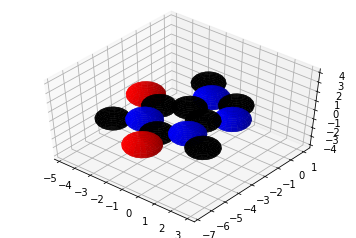

In [8]:
drawmol(caf1, 50, -50) # set a good angle for viewing

## 1.2 Two molecules in the beam

In [9]:
# Distance between samples
step = 1/16.
cutoff = 7

# Sample points on positive h-axis
h = np.arange(0, cutoff, step) + step
# Add sample points on negative axis and at the origin
h = np.concatenate((h[::-1], np.zeros(1), -h),axis=0)

# Use the same points for the k-axis
k = l = h

In [10]:
# Construct a two-dimensional grid
[H,K,L] = np.meshgrid(h,k,l)

Use the above settings for step length and cutoff for now (we will look at the effect of different settings later). You can view the plane with the command

Then evaluate the molecular transform of the caffeine molecule on the plane using the function **moltrans**

In [11]:
F = moltrans(caf0, H,K,L)
Ftrans = moltrans(caf1, H,K,L)

Let's check that the Fourier magnitude is unchanged when the object is translated

In [26]:
print("Magnitude difference: {:0.3f}".format(np.sum(np.abs(F)-np.abs(Ftrans))))

Magnitude difference: 0.000


Electron density

In [50]:
rho = fft.fftshift(abs(fft.ifftn(F, [2**8, 2**8, 2**8])))
rhoTrans = fft.fftshift(abs(fft.ifftn(Ftrans, [2**8, 2**8, 2**8])))

Now view the output of the Fourier transform (i.e. **rho**) using **imshow**. If you use the code below, you should get the right units on the axis.

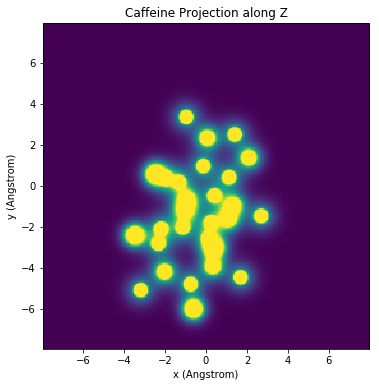

In [52]:
# Create vectors for the x and y coordinates.
size = rho.shape
x = np.linspace(0,1-1./size[1],size[1])/step
y = np.linspace(0,1-1./size[0],size[0])/step
x = x - np.mean(x)
y = y - np.mean(y)

# Draw the image
plt.imshow(rho[:,:,128]+rhoTrans[:,:,128], vmin=0, vmax=0.001, interpolation='none',origin='lower', extent = [x[0], x[-1], y[0], y[-1]])
plt.xlabel("x (Angstrom)")
plt.ylabel("y (Angstrom)")
plt.title("Caffeine Projection along Z")
plt.show()

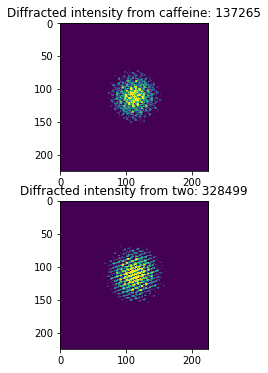

In [70]:
wv0 = F[:,:,113]
wv1 = Ftrans[:,:,113]
sum0 = np.sum(abs(wv0)**2)
sum1 = np.sum(abs(wv0+wv1)**2)
plt.subplot(211)
plt.imshow(np.log(abs(wv0)**2+np.finfo(float).tiny), vmin=0, vmax=5, interpolation='none')
plt.title('Diffracted intensity from caffeine: {:0.0f}'.format(sum0))
plt.subplot(212)
plt.imshow(np.log(abs(wv0+wv1)**2+np.finfo(float).tiny), vmin=0, vmax=5, interpolation='none')
plt.title('Diffracted intensity from two: {:0.0f}'.format(sum1))
plt.show()

How does the diffracted intensity scale with number of particles in the beam?

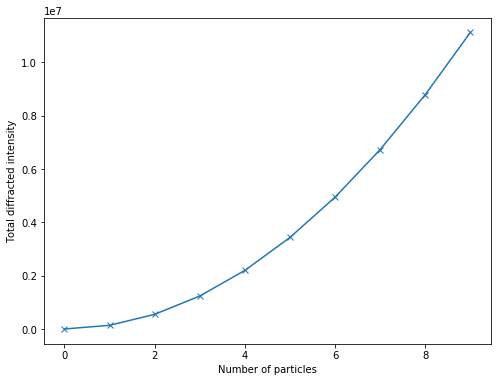

In [69]:
totI = np.zeros(10,)
for i in range(10):
    totI[i] = np.sum(abs(wv0*i)**2)
plt.plot(totI,'x-'); 
plt.ylabel('Total diffracted intensity')
plt.xlabel('Number of particles'); plt.show()